## This part of the code is for the initial visualisation of the data ONLY #
## The actual test code is in the file "HT6-Part 2.ipynb" included in this archive ##


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
url = "https://dshs.texas.gov/coronavirus/TexasCOVID-19ActiveCaseDatabyCounty.xlsx"

active = pd.read_excel(url , sheet_name = 'Active' ,skiprows=2)
active=active.truncate(before=0,after=253)
active2 = active.set_index('County')
active2

active=active.drop(['Notes'], axis=1)
active.keys()
active2 =active.set_index('County')
active2
from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in active2.keys()]
import re
active3 = active2
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
active3.columns=[pattern.findall(sub)[0] for sub in active3.keys()]
active3


,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,...,09-26,09-27,09-28,09-29,09-30,10-01,10-02,10-03,10-04,10-05
County,,,,,,,,,,,,,,,,,,,,,
Anderson,261.0,316.0,313.0,308.0,304.0,318.0,396.0,382.0,382.0,374.0,...,1121.0,1121.0,1118.0,1118.0,1118.0,1149.0,1149.0,1149.0,1149.0,1168.0
Andrews,313.0,313.0,313.0,313.0,360.0,337.0,337.0,334.0,332.0,331.0,...,396.0,396.0,396.0,396.0,424.0,211.0,211.0,211.0,211.0,198.0
Angelina,751.0,731.0,923.0,914.0,920.0,1001.0,1000.0,886.0,1031.0,1031.0,...,1184.0,1184.0,1356.0,1394.0,943.0,941.0,862.0,830.0,830.0,773.0
Aransas,103.0,101.0,96.0,97.0,86.0,89.0,89.0,87.0,87.0,100.0,...,227.0,225.0,214.0,205.0,195.0,179.0,184.0,171.0,163.0,153.0
Archer,45.0,44.0,44.0,44.0,27.0,19.0,18.0,25.0,24.0,24.0,...,18.0,18.0,14.0,15.0,18.0,21.0,21.0,21.0,21.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,357.0,392.0,391.0,391.0,415.0,428.0,446.0,456.0,429.0,428.0,...,1419.0,1419.0,1491.0,1491.0,1491.0,1521.0,1521.0,1521.0,1521.0,1610.0
Yoakum,112.0,110.0,110.0,110.0,78.0,58.0,57.0,57.0,65.0,65.0,...,43.0,43.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,26.0
Young,68.0,50.0,50.0,50.0,47.0,43.0,51.0,63.0,60.0,60.0,...,8.0,8.0,5.0,8.0,10.0,11.0,10.0,10.0,10.0,6.0


<ipython-input-3-a4f8e5c6916a>:60: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "whitespace" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('ActiveCaseCounty.png', dpi=60, whitespace='b')


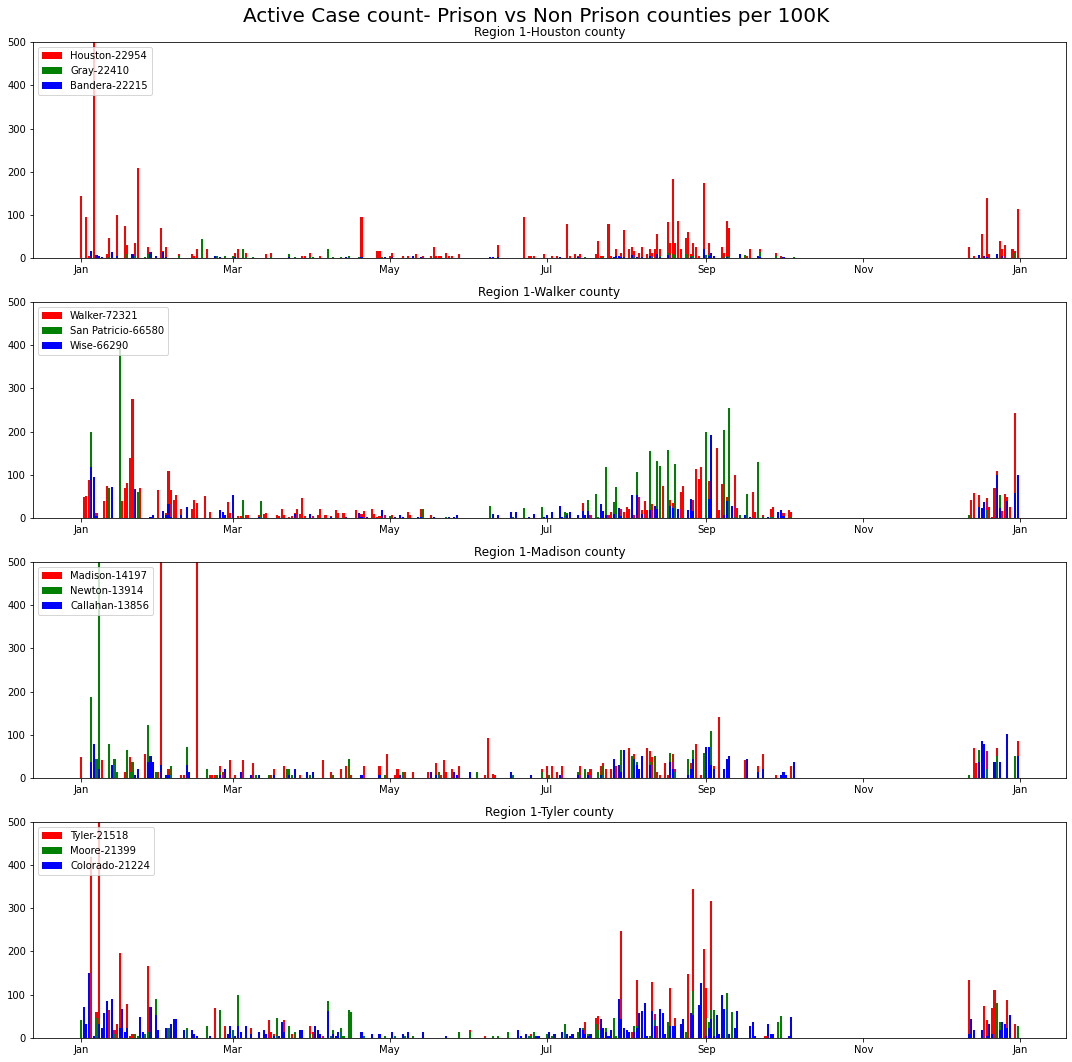

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

mydf = active3.T.copy()
fig = plt.figure(figsize=(15,15))
fig.suptitle('Active Case count- Prison vs Non Prison counties per 100K', fontsize=20, color='Black')

ax1 = fig.add_subplot(4,1,1)
ax1.title.set_text('Region 1-Houston county')
ax1.set_ylim(0,500)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.bar(dates, mydf['Houston'], color='Red')
plt.bar(dates,mydf['Houston'].diff() * (100000/22954),color = 'Red')
plt.bar(dates, mydf['Gray'].diff() * (10000/22410), color='Green')
plt.bar(dates, mydf['Bandera'].diff() * (10000/22215), color='Blue')
ax1.legend(['Houston-22954', 'Gray-22410', 'Bandera-22215'], loc='upper left')

ax2 = fig.add_subplot(4,1,2)
ax2.title.set_text('Region 1-Walker county')
ax2.set_ylim(0,500)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(dates, mydf['Walker'].diff()*(100000/72321), color='Red')
plt.bar(dates, mydf['San Patricio'].diff()*(100000/67008), color='Green')
plt.bar(dates, mydf['Wise'].diff()*(100000/66290), color='Blue')
ax2.legend(['Walker-72321', 'San Patricio-66580', 'Wise-66290'], loc='upper left')

ax3 = fig.add_subplot(4,1,3)
ax3.title.set_text('Region 1-Madison county')
ax3.set_ylim(0,500)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(dates, mydf['Madison'].diff()*(100000/14197), color='Red')
plt.bar(dates, mydf['Newton'].diff()*(100000/13914), color='Green')
plt.bar(dates, mydf['Callahan'].diff()*(100000/13856), color='Blue')
ax3.legend(['Madison-14197', 'Newton-13914', 'Callahan-13856'], loc='upper left')


ax4 = fig.add_subplot(4,1,4)
ax4.title.set_text('Region 1-Tyler county')
ax4.set_ylim(0,500)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(dates, mydf['Tyler'].diff()*(100000/21518), color='Red')
plt.bar(dates, mydf['Moore'].diff()*(100000/21399), color='Green')
plt.bar(dates, mydf['Colorado'].diff()*(100000/21224), color='Blue')
ax4.legend(['Tyler-21518', 'Moore-21399', 'Colorado-21224'], loc='upper left')


#ax5 = fig.add_subplot(5,1,5)
#ax5.title.set_text('Region 1-Polk county')
#ax5.set_ylim(0,500)
#ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.bar(dates, mydf['Polk'].diff()*(100000/48913), color='Red')
#plt.bar(dates, mydf['Burnet'].diff()*(100000/46530), color='Green')
#plt.bar(dates, mydf['Wood'].diff()*(100000/44366), color='Blue')
#ax5.legend(['Polk-48913', 'Burnet-46530', 'Wood-44366'], loc='upper left')

plt.tight_layout()
fig.patch.set_facecolor('white')

#save the figure
fig.savefig('ActiveCaseCounty.png', dpi=60, whitespace='b')